# Assignment 1
## This notebook implements analysis of a number of ML models using two specific datasets
These two datasets look at Diabetes health predictors and Airline Passenger Satisfaction.

### Airline Passenger 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from sklearn.exceptions import ConvergenceWarning
import warnings

In [2]:
# @ignore_warnings(category=ConvergenceWarning)
# def my_function():
#     # Code that triggers the warning
# "https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/download?datasetVersionNumber=1"

In [3]:
scoring = {"F1": "f1", "Accuracy": "accuracy", "Precision": 'precision', "Recall": 'recall', "AUC": "roc_auc"}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scoring = ['accuracy', 'f1', 'roc_auc']

In [4]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

In [5]:
airline_data = pd.read_csv('../../Data/AirlinePassengerSatisfaction/train.csv',index_col=0)

In [6]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
airline_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Check for imbalanced data

In [8]:
## If forecasting diabetes, is the data imbalanced
airline_data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

## About equal. 43% - we can avoid balancing the data

In [ ]:
## Categorical vs numeric

In [58]:
# split the dataframe into its numerical and categorical components
X_num = airline_data.select_dtypes(exclude='object')
X_cat = airline_data.select_dtypes(include='object')

In [59]:
X_num.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [60]:
X_cat.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [9]:
airline_data = airline_data.loc[:, airline_data.columns!='id']

/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_60351/2192999628.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = airline_data.hist(ax=ax)


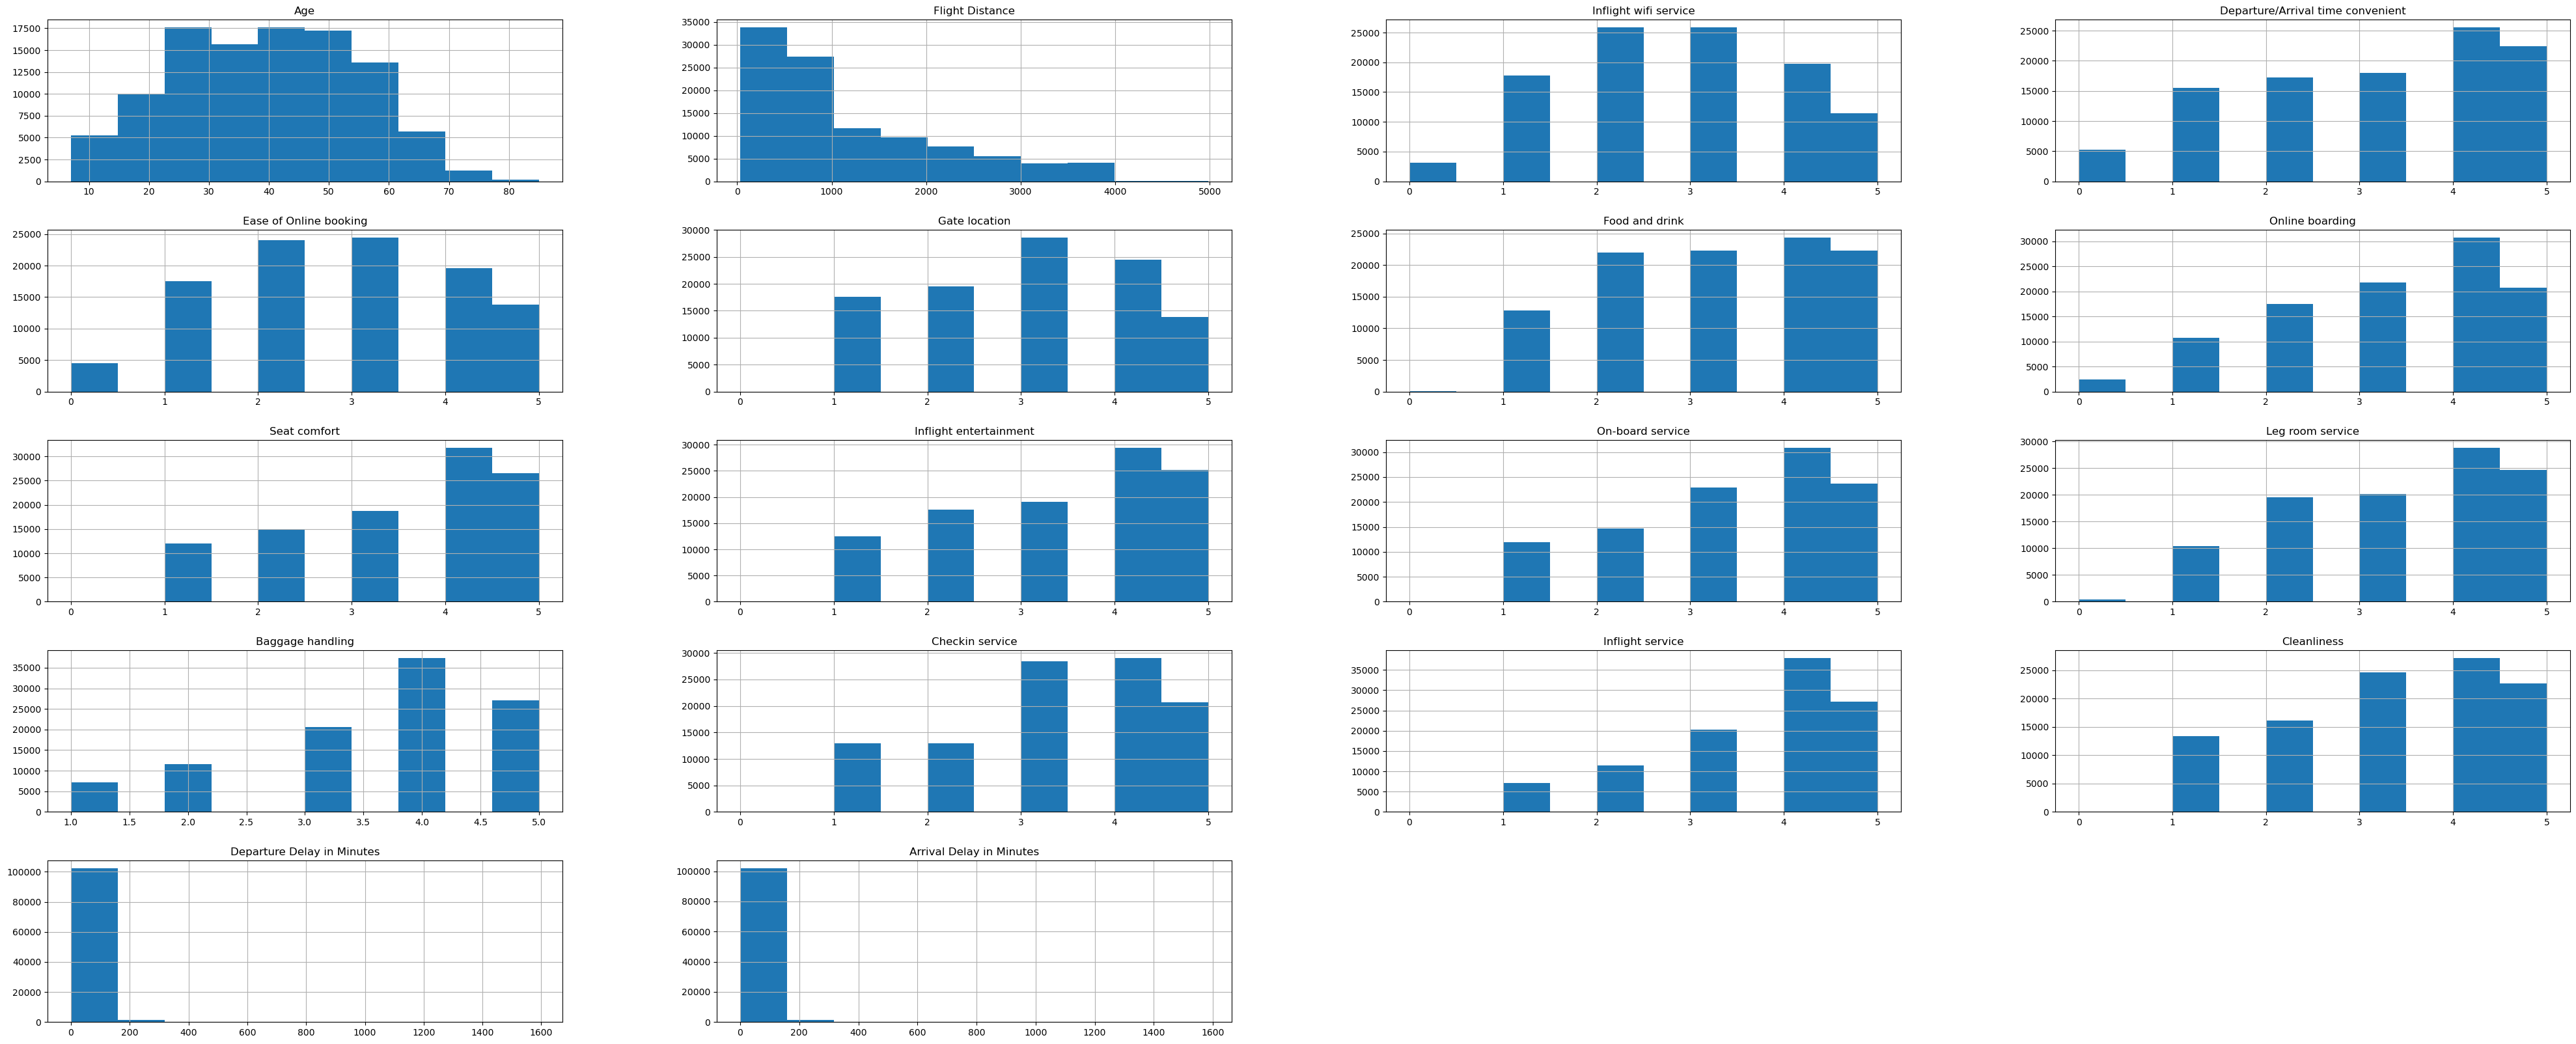

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = airline_data.hist(ax=ax)
plt.show()

In [11]:
# split the dataframe into its numerical and categorical components
X_num = airline_data.select_dtypes(exclude='object')
X_cat = airline_data.select_dtypes(include='object')

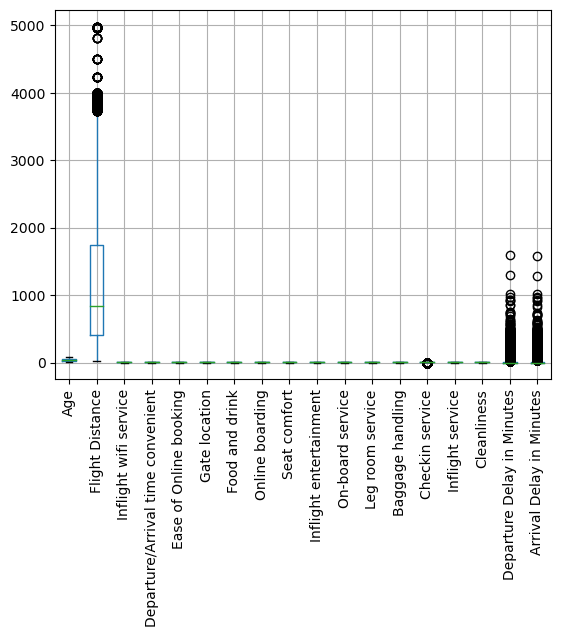

In [12]:

airline_data.boxplot(rot=90)
plt.show()

In [13]:
airline_data_encoded = airline_data.copy()

In [14]:
enc = OrdinalEncoder(categories=[['neutral or dissatisfied','satisfied']])
airline_data_encoded['satisfaction'] = enc.fit_transform(airline_data_encoded[['satisfaction']])

In [15]:
enc = OrdinalEncoder(categories=[['Eco','Eco Plus','Business']])
airline_data_encoded['Class'] = enc.fit_transform(airline_data_encoded[['Class']])

In [16]:
enc = OrdinalEncoder(categories=[['disloyal Customer','Loyal Customer']])
airline_data_encoded['Customer Type'] = enc.fit_transform(airline_data_encoded[['Customer Type']])

In [17]:
label_encoder = LabelEncoder()
airline_data_encoded['Gender'] = label_encoder.fit_transform(airline_data_encoded['Gender'])
airline_data_encoded['Type of Travel'] = label_encoder.fit_transform(airline_data_encoded['Type of Travel'])

/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_60351/3729865174.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = airline_data_encoded.hist(ax=ax)


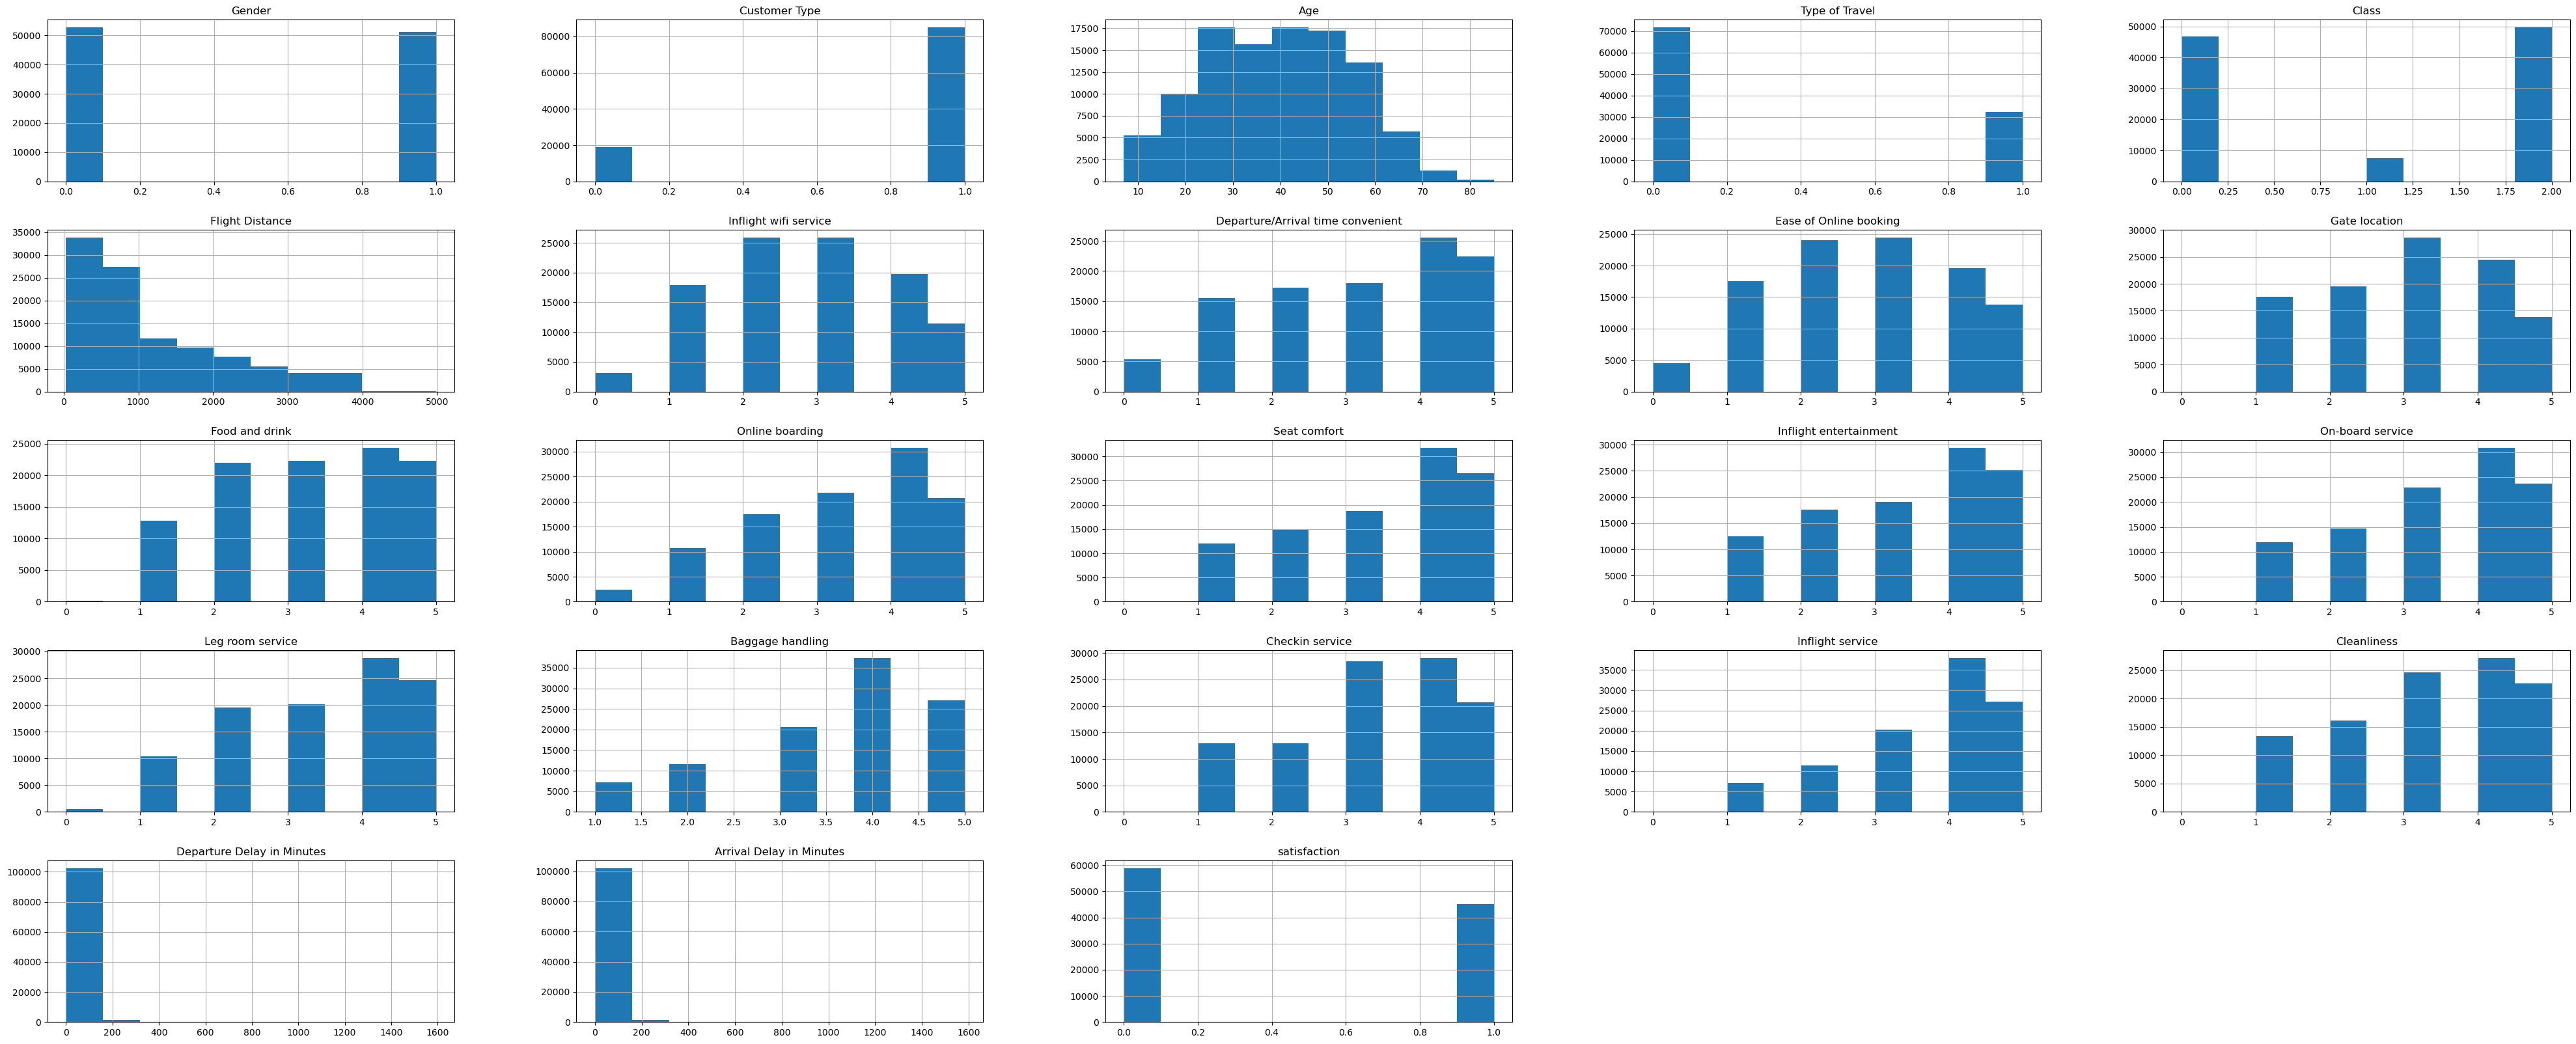

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = airline_data_encoded.hist(ax=ax)
plt.show()

In [19]:
# https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/
def cross_validation(model, _X, _y, _cv=5):
    '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    return results
      # return {"Training Accuracy scores": results['train_accuracy'],
      #         "Mean Training Accuracy": results['train_accuracy'].mean()*100,
      #         "Training Precision scores": results['train_precision'],
      #         "Mean Training Precision": results['train_precision'].mean(),
      #         "Training Recall scores": results['train_recall'],
      #         "Mean Training Recall": results['train_recall'].mean(),
      #         "Training F1 scores": results['train_f1'],
      #         "Mean Training F1 Score": results['train_f1'].mean(),
      #         "Validation Accuracy scores": results['test_accuracy'],
      #         "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
      #         "Validation Precision scores": results['test_precision'],
      #         "Mean Validation Precision": results['test_precision'].mean(),
      #         "Validation Recall scores": results['test_recall'],
      #         "Mean Validation Recall": results['test_recall'].mean(),
      #         "Validation F1 scores": results['test_f1'],
      #         "Mean Validation F1 Score": results['test_f1'].mean()
      #         }

In [20]:
airline_data_encoded.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [21]:
airline_data_encoded.isna().sum().sum()

310

In [22]:
airline_data_encoded = airline_data_encoded[~airline_data_encoded.isna().any(axis=1)]

In [23]:
airline_data_encoded

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,13,1,1.0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0.0
1,1,0.0,25,0,2.0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0.0
2,0,1.0,26,0,2.0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1.0
3,0,1.0,25,0,2.0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0.0
4,1,1.0,61,0,2.0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0.0,23,0,0.0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0.0
103900,1,1.0,49,0,2.0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1.0
103901,1,0.0,30,0,2.0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0.0
103902,0,0.0,22,0,0.0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0.0


In [24]:
X = airline_data_encoded[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
y = airline_data_encoded['satisfaction']

In [25]:
# scale the data to be in the same range
#
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = X.copy()
X_train_minmax[X_train_minmax.columns] = min_max_scaler.fit_transform(X_train_minmax[X_train_minmax.columns])

In [26]:
# standard_scaler = preprocessing.StandardScaler()
# X_train_standard = X.copy()
# X_train_standard[X_train_standard.columns] = standard_scaler.fit_transform(X_train_standard[X_train_standard.columns])

In [27]:
X_train_minmax

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,1.0,0.076923,1.0,0.5,0.086632,0.6,0.8,0.6,0.2,...,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,1.0,0.0,0.230769,0.0,1.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,0.0,1.0,0.243590,0.0,1.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,0.0,1.0,0.230769,0.0,1.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,1.0,1.0,0.692308,0.0,1.0,0.036955,0.6,0.6,0.6,0.6,...,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.0,0.0,0.205128,0.0,0.0,0.032512,0.4,0.2,0.4,0.6,...,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000
103900,1.0,1.0,0.538462,0.0,1.0,0.467690,0.8,0.8,0.8,0.8,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000
103901,1.0,0.0,0.294872,0.0,1.0,0.396607,0.2,0.2,0.2,0.6,...,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838
103902,0.0,0.0,0.192308,0.0,0.0,0.195679,0.2,0.2,0.2,1.0,...,0.2,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,0.000000


/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_60351/3866619373.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = X_train_minmax.hist(ax=ax)


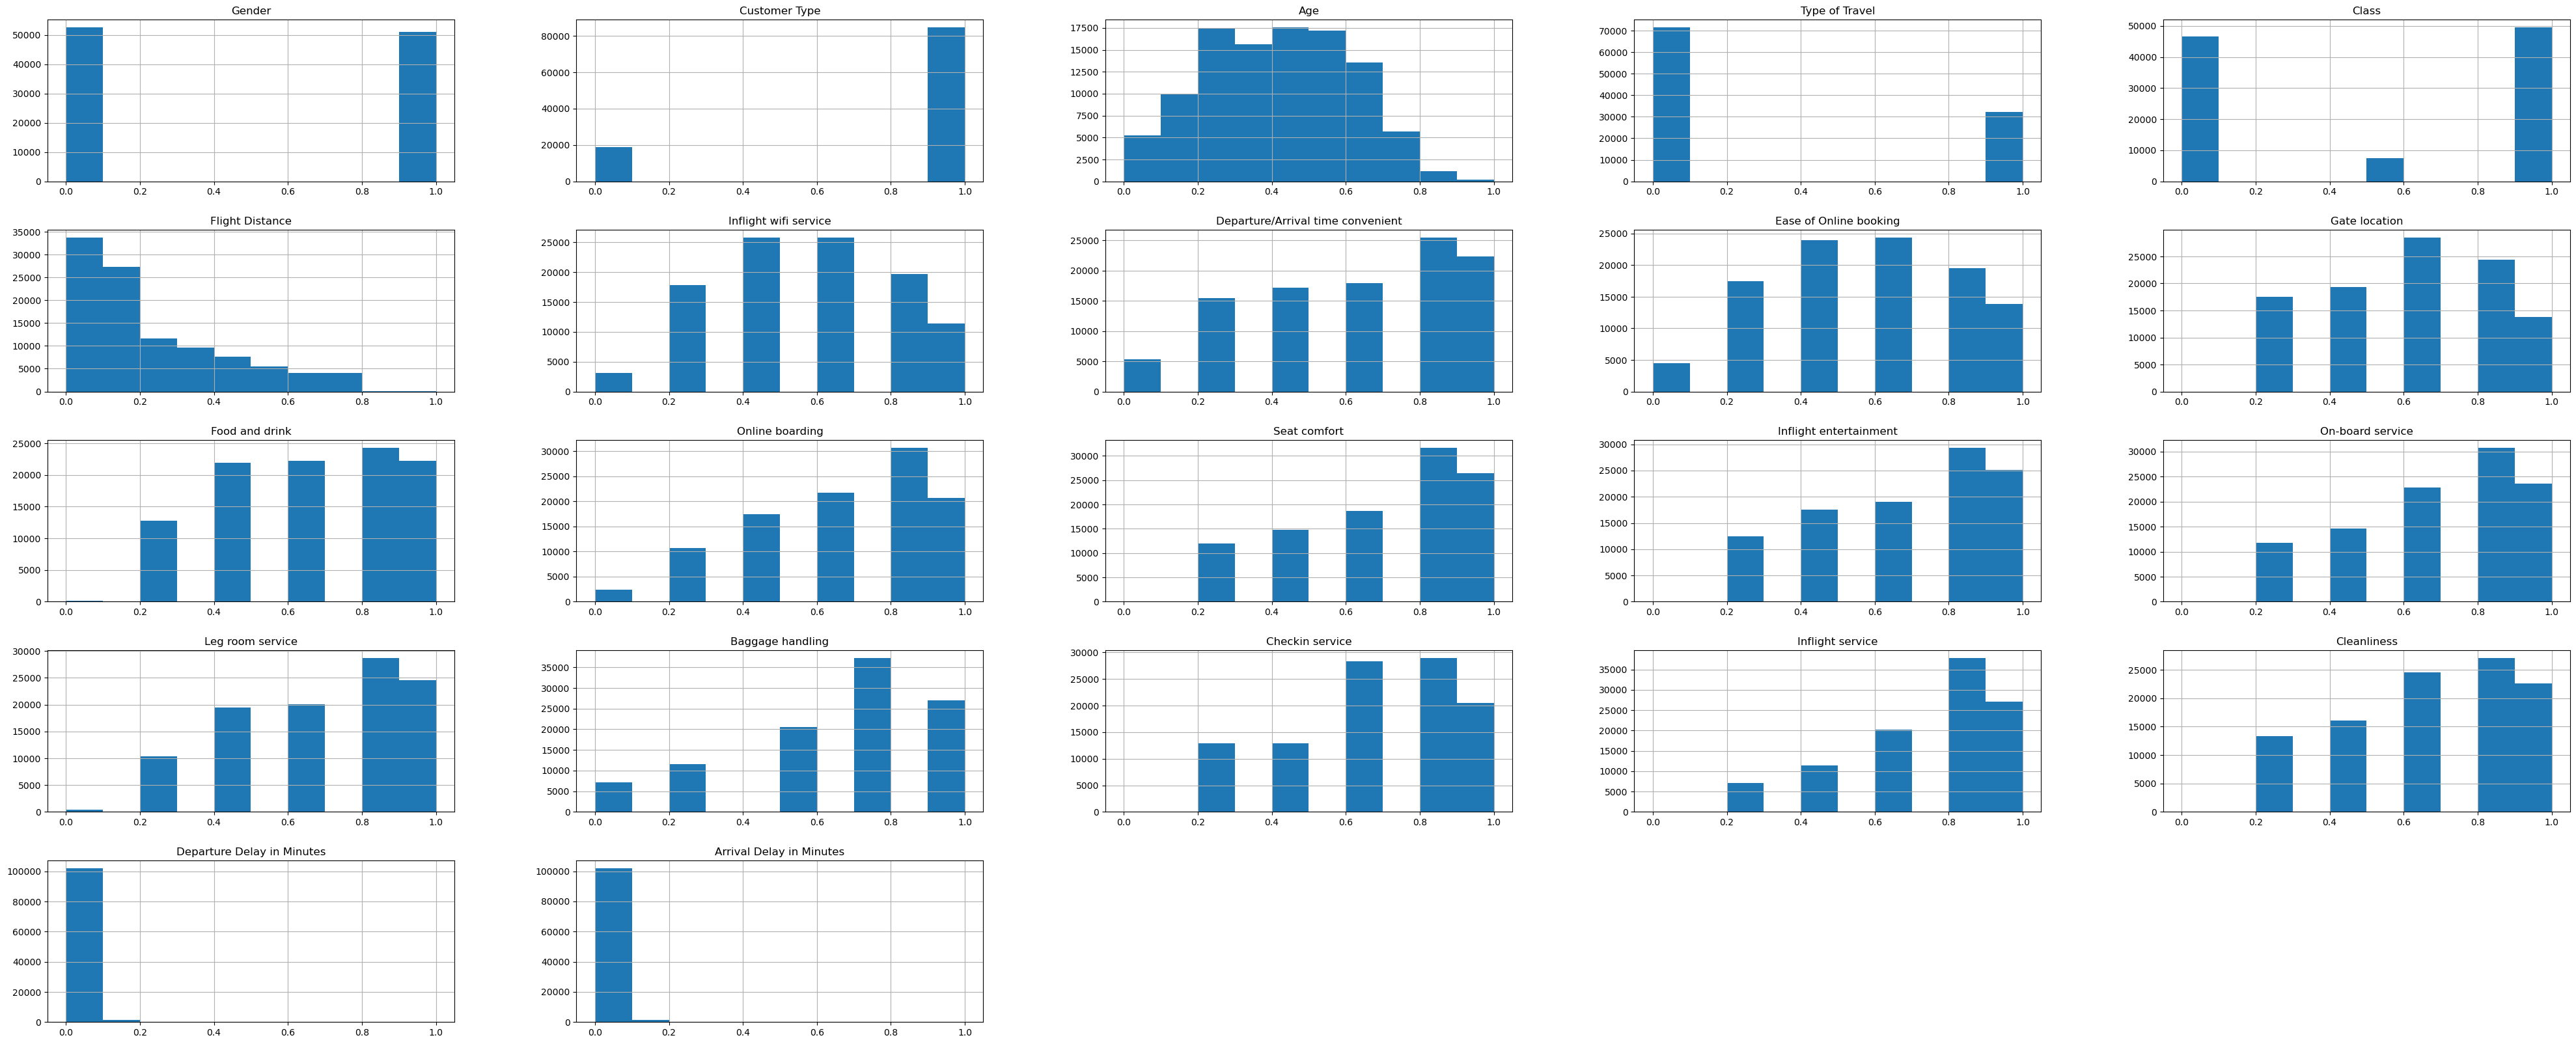

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = X_train_minmax.hist(ax=ax)
plt.show()

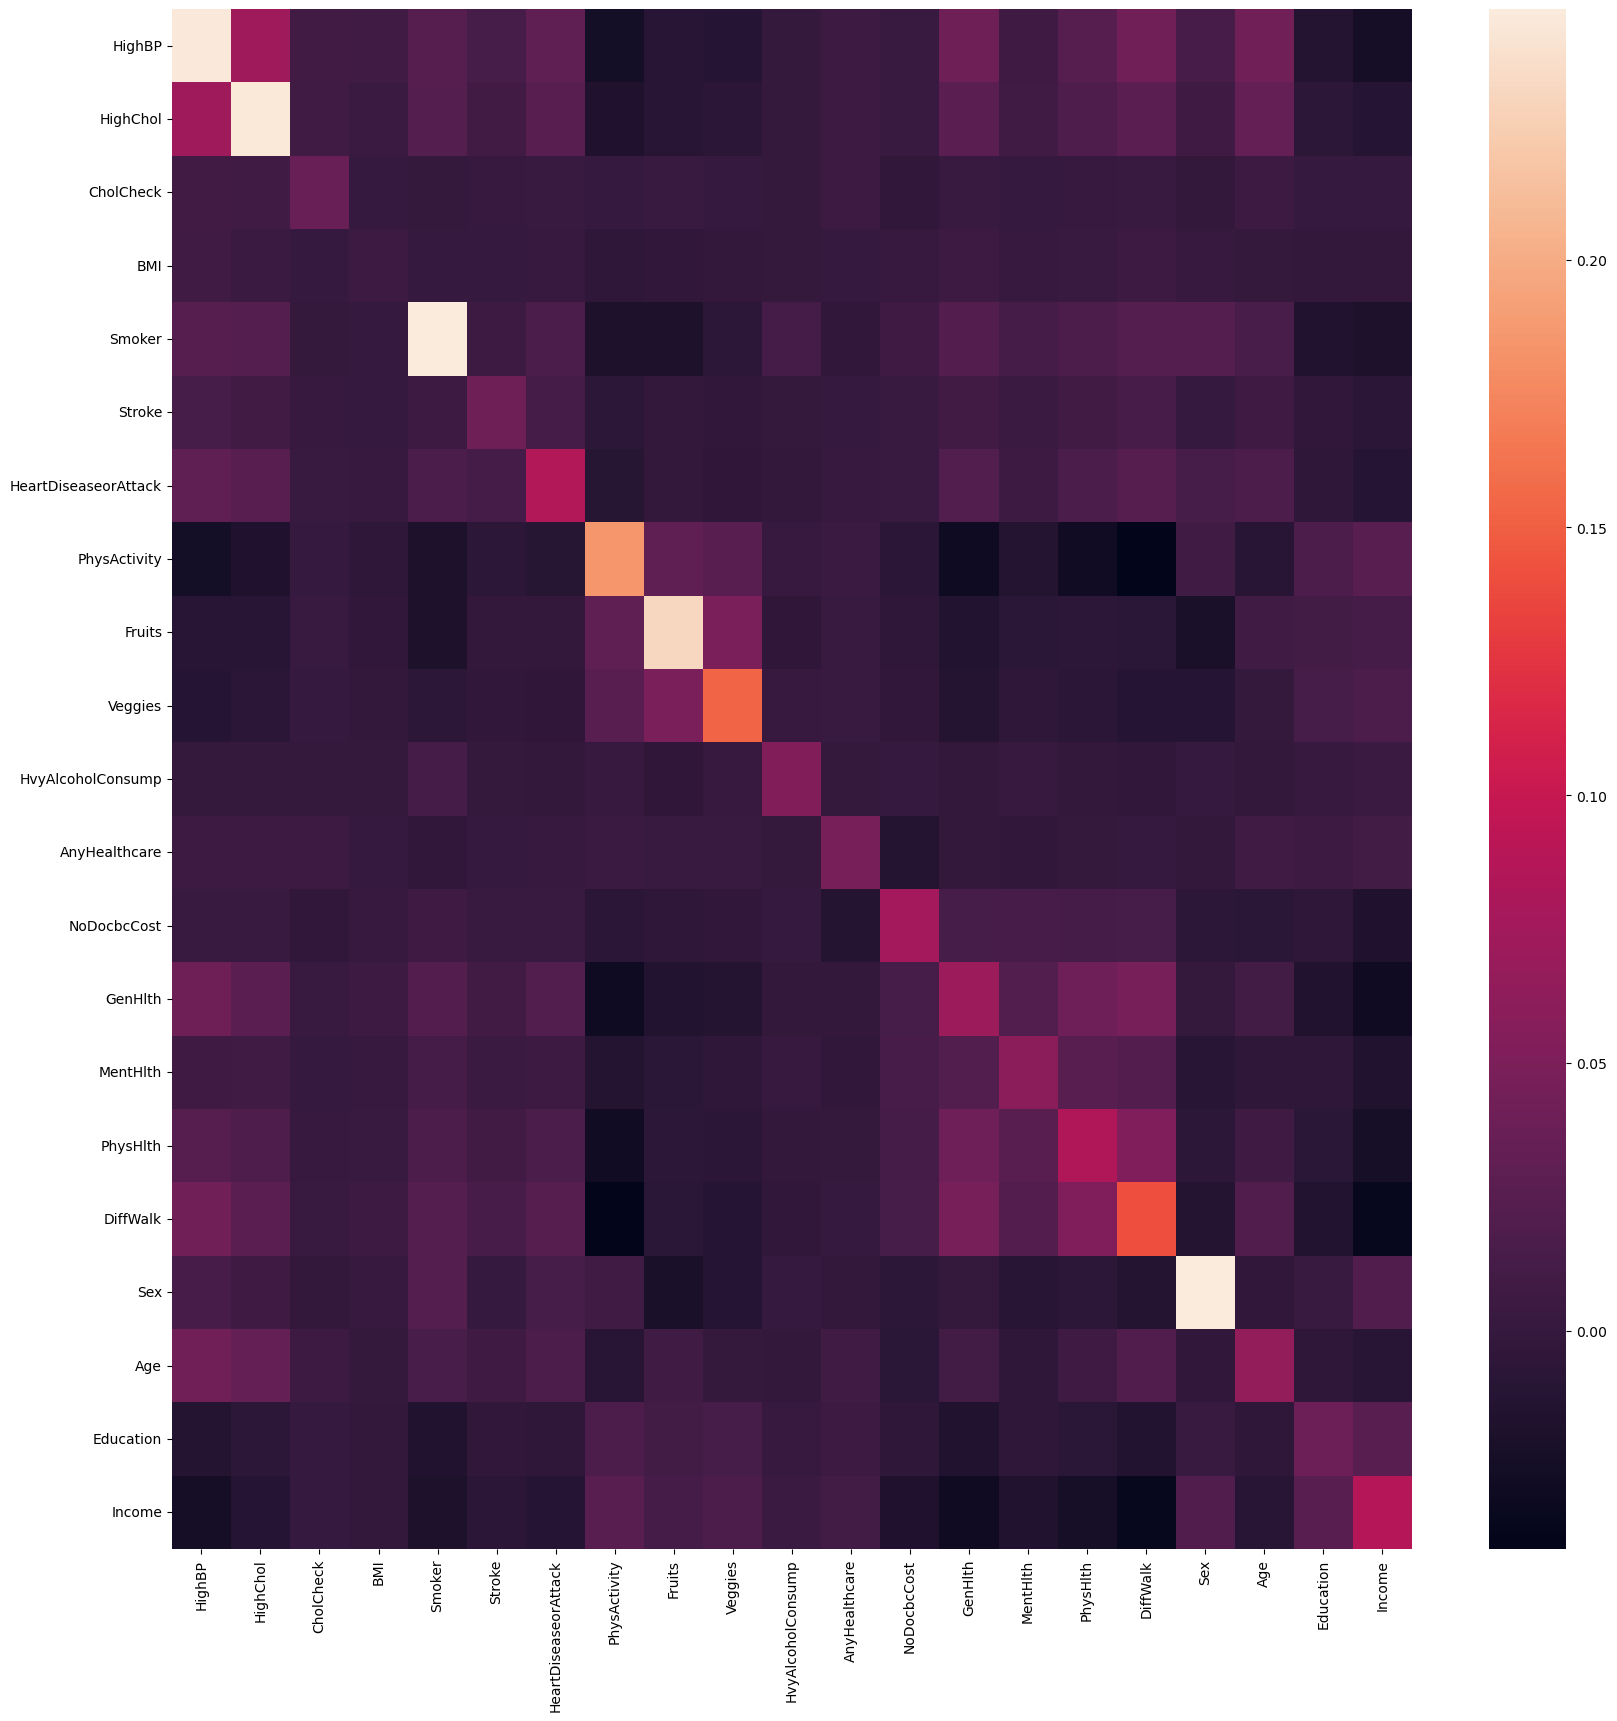

In [62]:
plt.figure(figsize=(20,20))

cov_matrix = pd.DataFrame.cov(X_train_minmax)
sn.heatmap(cov_matrix, annot=False, fmt='g')
plt.show()

<AxesSubplot: >

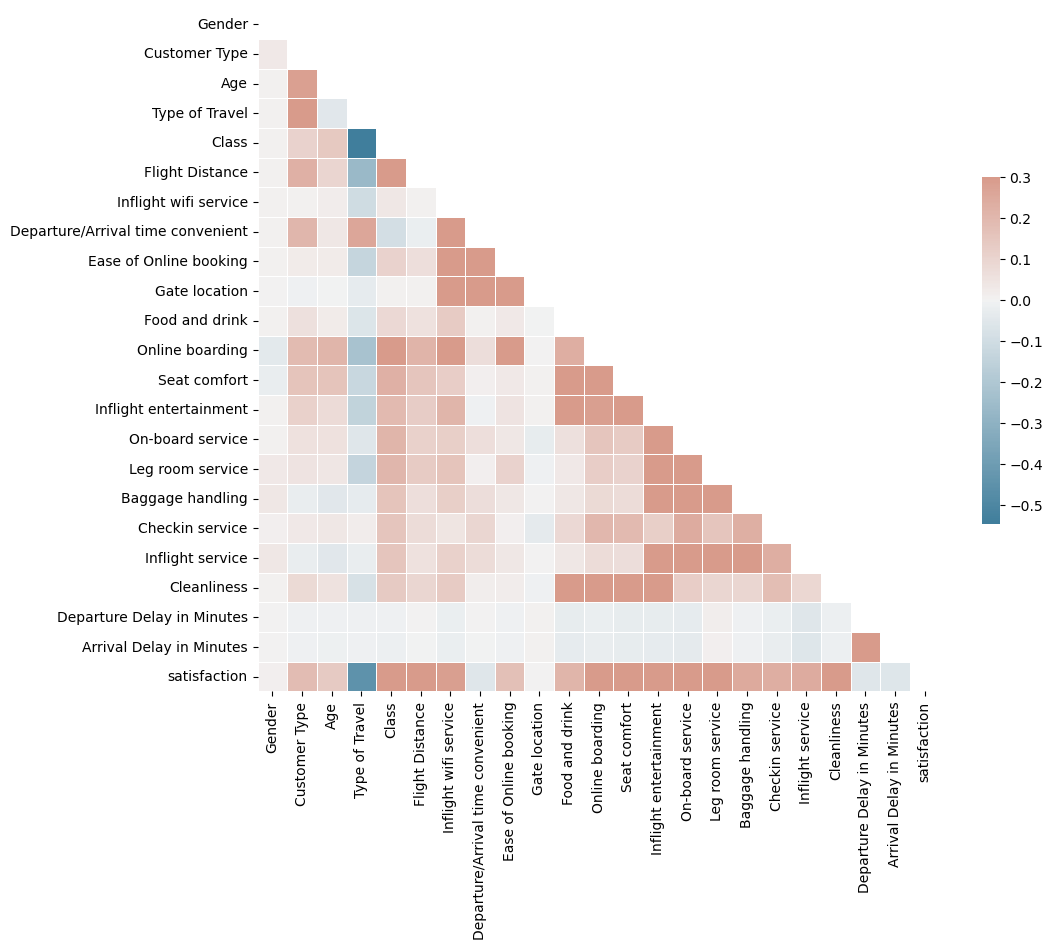

In [67]:
# Compute the correlation matrix
corr = airline_data_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: >

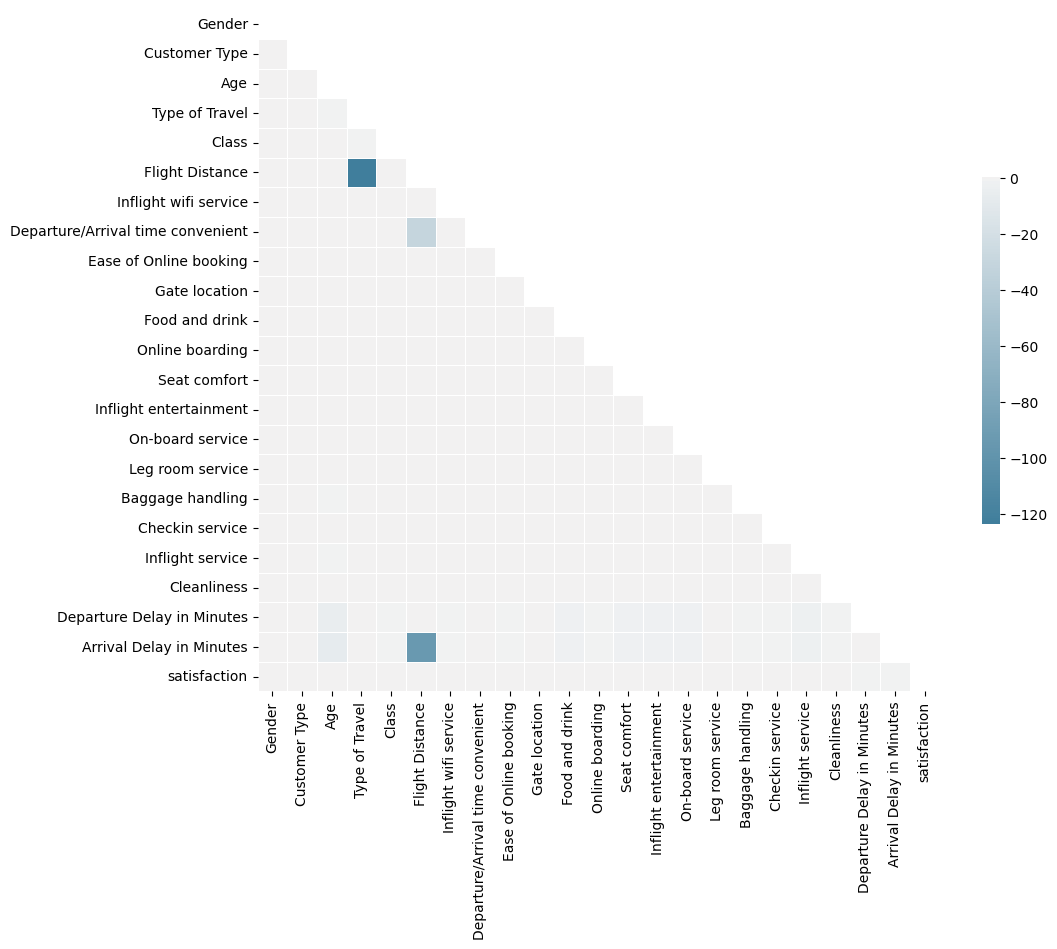

In [68]:
# Compute the correlation matrix
cov = airline_data_encoded.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(cov, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
%%time
# train_sizes, train_scores, validation_scores = \
#     learning_curve(estimator = decision_tree_model,
#                    X = X_train_minmax,
#                    y = y, train_sizes = train_sizes_range, cv = 5,
#                    scoring = 'accuracy') #['accuracy', 'precision', 'recall', 'f1'])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [30]:
# %%time
# train_sizes, train_scores, validation_scores = \
#     learning_curve(estimator = knn_model,
#                    X = X.iloc[:5000],
#                    y = y.iloc[:5000], train_sizes = train_sizes, cv = 5,
#                    scoring = 'accuracy') #['accuracy', 'precision', 'recall', 'f1'])

In [31]:
# #plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')
# plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
# plt.ylabel('Accuracy', fontsize = 14)
# plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves for KNN Model', fontsize = 18, y = 1.03)
# plt.legend()
# plt.ylim(0,1)

In [32]:
# #plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')
# plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
# plt.ylabel('Accuracy', fontsize = 14)
# plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves for KNN Model', fontsize = 18, y = 1.03)
# plt.legend()
# plt.ylim(0,1)

### Now Diabetes Dataset

In [33]:

diabetes_data =  pd.read_csv('../../Data/DiabetesHealthIndicatorDataset/diabetes_binary_health_indicators_BRFSS2015.csv')



In [34]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [35]:
diabetes_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


/var/folders/xf/r_88dyyx2kj6wz8hnrj90_3m0000gn/T/ipykernel_60351/377347112.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig = diabetes_data.hist(ax=ax)


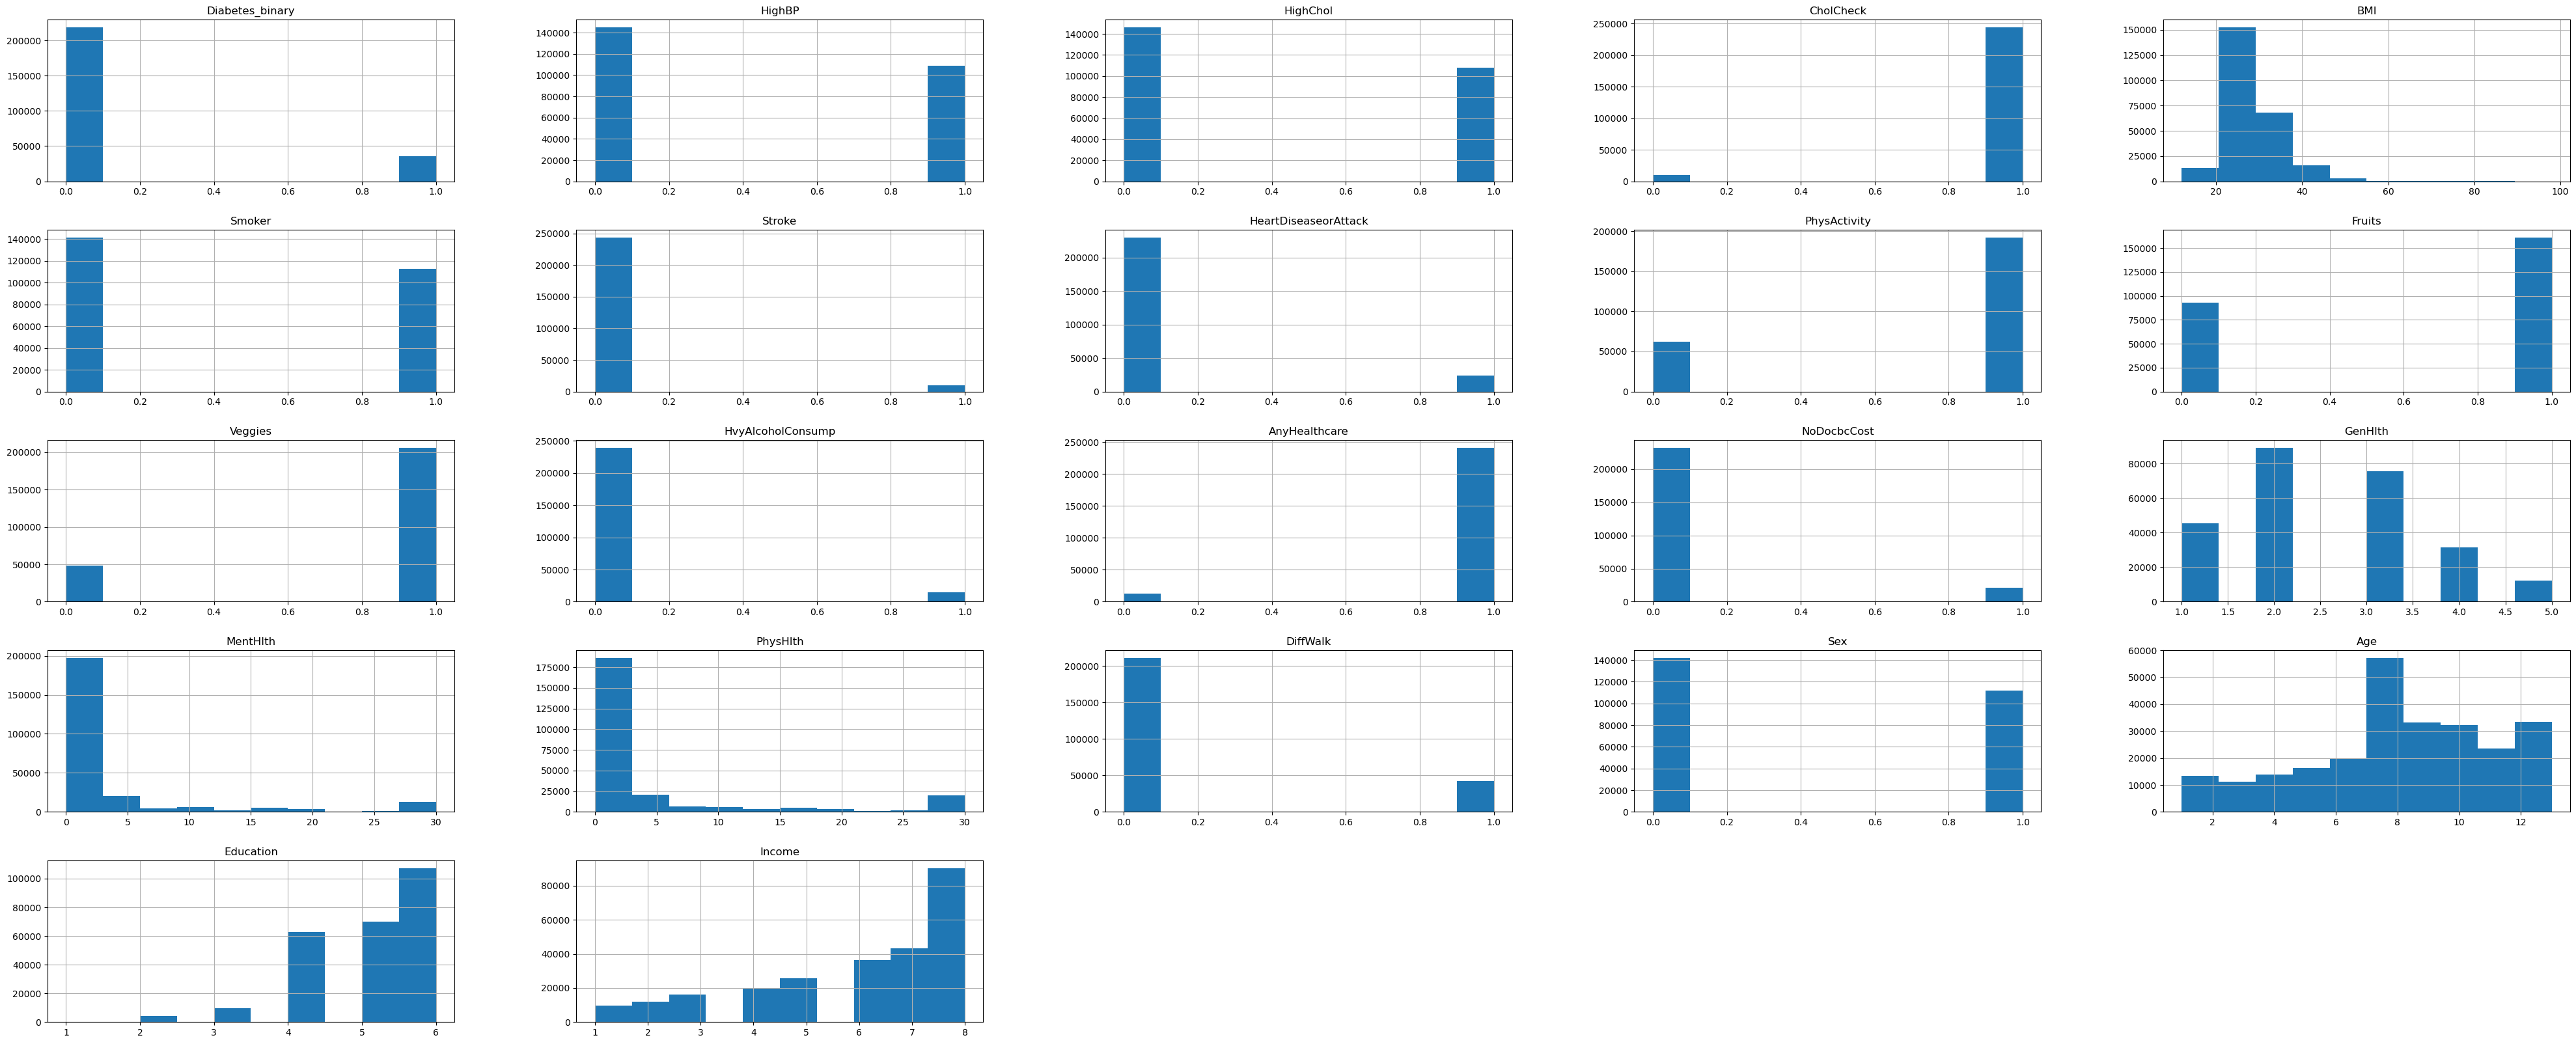

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), sharey=False)
fig = diabetes_data.hist(ax=ax)
plt.show()

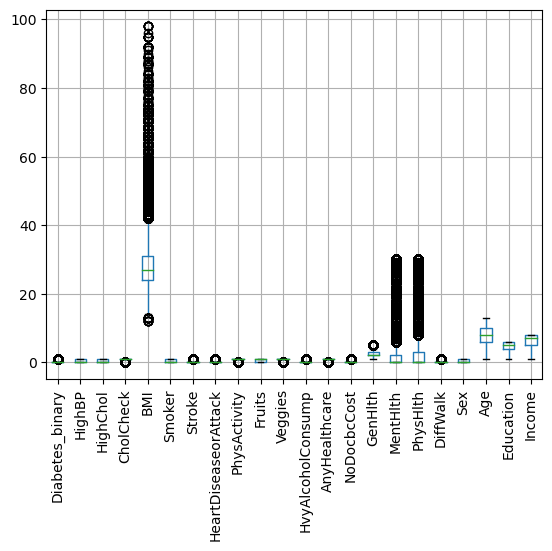

In [37]:
diabetes_data.boxplot(rot=90)
plt.show()

In [70]:
# plt.figure(figsize=(20,20))

# cov_matrix = pd.DataFrame.cov(X_train_minmax)
# sn.heatmap(cov_matrix, annot=False, fmt='g')
# plt.show()

In [39]:
# from sklearn.preprocessing import StandardScaler
# stdsc = StandardScaler()
# X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values
# cov_mat =np.cov(X_std.T)

In [40]:
# print(cov_matrix)

In [41]:
# cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
# from sklearn.preprocessing import StandardScaler
# stdsc = StandardScaler()
# X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values
# cov_mat =np.cov(X_std.T)

In [42]:
# plt.figure(figsize=(10,10))
# sns.set(font_scale=1.5)
# hm = sns.heatmap(cov_mat,
#                  cbar=True,
#                  annot=True,
#                  square=True,
#                  fmt='.2f',
#                  annot_kws={'size': 12},
#                  yticklabels=cols,
#                  xticklabels=cols)
# plt.title('Covariance matrix showing correlation coefficients')
# plt.tight_layout()
# plt.show()

## Check for imbalanced dataset

In [43]:
## If forecasting diabetes, is the data imbalanced
diabetes_data['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [44]:
diabetes_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<AxesSubplot: >

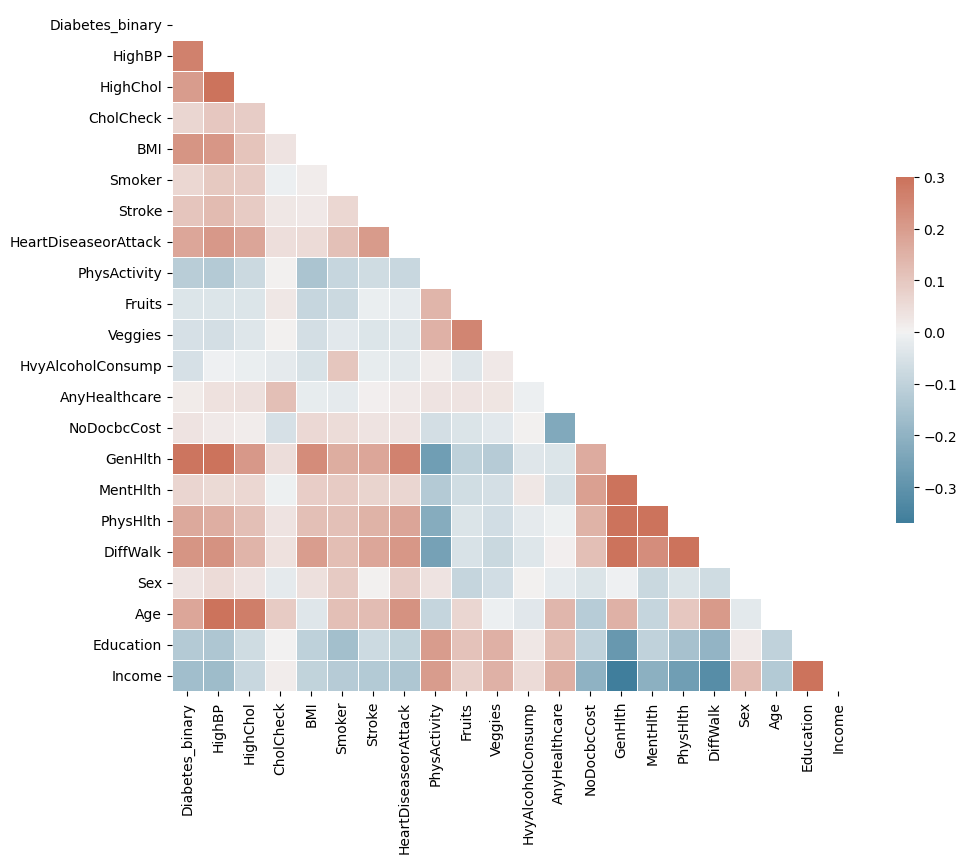

In [69]:
# Compute the correlation matrix
corr = diabetes_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: >

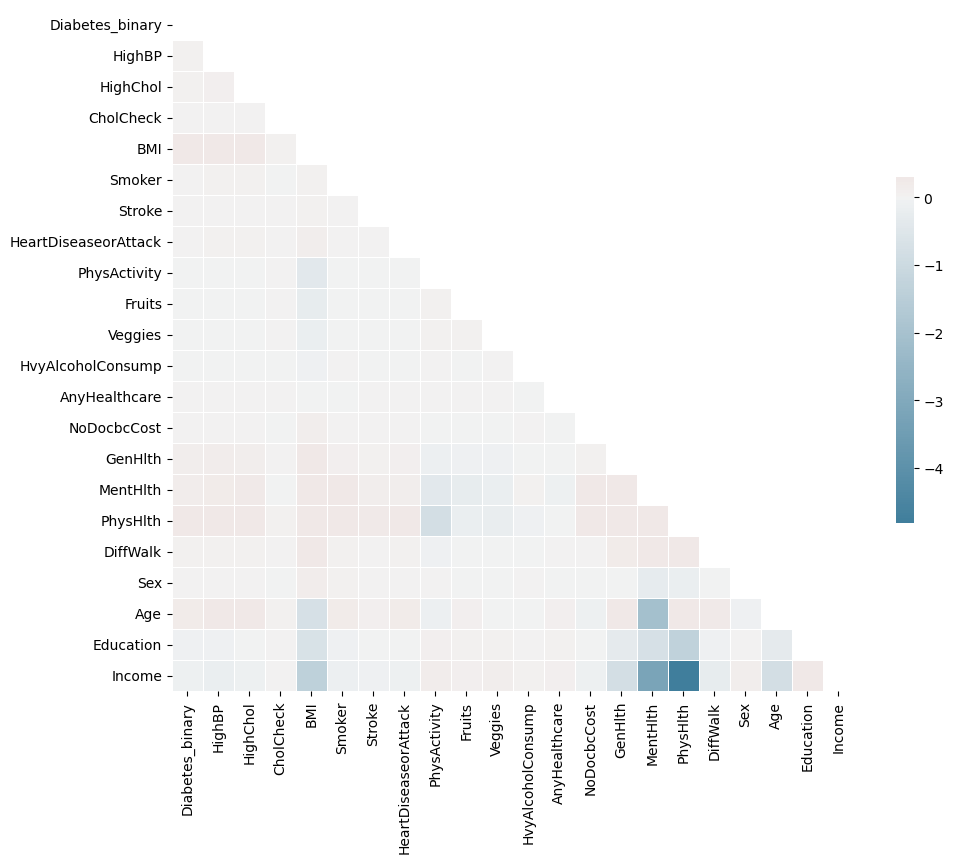

In [71]:
# Compute the correlation matrix
cov = diabetes_data.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(cov, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Balance the dataset 

In [45]:
## Split into training and test/holdout

In [46]:

diabetes_train, diabetes_test_holdout = train_test_split(diabetes_data, test_size=0.2)

In [47]:
## Split into training and validation

In [48]:
diabetes_train, diabetes_validation = train_test_split(diabetes_train, test_size=0.2)

In [49]:
X = diabetes_train[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker','Stroke',\
                    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', \
                    'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', \
                    'Sex', 'Age', 'Education','Income']]
# X = diabetes_train.loc[:, diabetes_train.columns!='Diabetes_binary']

y = diabetes_train['Diabetes_binary']

In [50]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = X.copy()
X_train_minmax[X_train_minmax.columns] = min_max_scaler.fit_transform(X_train_minmax[X_train_minmax.columns])

In [51]:
X_train_minmax.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
175912,0.0,0.0,1.0,0.162791,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,1.0,0.750000,0.6,0.714286
91582,1.0,0.0,1.0,0.313953,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,1.000000,0.000000,1.0,0.0,0.250000,1.0,0.714286
203851,1.0,1.0,1.0,0.220930,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.50,0.500000,0.000000,0.0,0.0,0.666667,0.8,0.428571
115061,1.0,1.0,1.0,0.162791,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,1.000000,0.6,0.428571
64935,0.0,1.0,1.0,0.162791,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.133333,0.066667,0.0,0.0,0.666667,1.0,0.857143
37132,1.0,1.0,1.0,0.174419,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.25,0.000000,0.100000,1.0,1.0,0.583333,0.4,0.428571
229829,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,1.0,0.833333,1.0,0.857143
43013,0.0,0.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.166667,0.000000,0.0,1.0,0.583333,0.8,0.714286
188669,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.000000,0.0,1.0,0.750000,0.8,0.857143
154183,1.0,1.0,1.0,0.279070,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,1.0,0.666667,1.0,1.000000


### Resample the data

In [52]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_minmax,y)

In [53]:
X_resampled.value_counts()

HighBP  HighChol  CholCheck  BMI       Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age       Education  Income  
0.0     0.0       1.0        0.127907  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       0.0  0.583333  1.0        1.000000    38
                             0.104651  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       0.0  0.416667  1.0        1.000000    38
                             0.127907  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       0.0  0.416667  1.0        1.000000    36
                             0.139535  0.0     0.0     0.0        

In [54]:
y_resampled.value_counts()

0.0    139824
1.0    139824
Name: Diabetes_binary, dtype: int64

In [55]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_minmax,y)

In [56]:
X_resampled.value_counts()

HighBP  HighChol  CholCheck  BMI       Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age       Education  Income  
0.0     0.0       1.0        0.127907  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       0.0  0.583333  1.0        1.000000    11
                             0.139535  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       1.0  0.666667  1.0        1.000000     8
                             0.104651  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          0.00     0.000000  0.000000  0.0       0.0  0.250000  1.0        1.000000     7
                             0.116279  0.0     0.0     0.0        

In [57]:
y_resampled.value_counts()

0.0    22531
1.0    22531
Name: Diabetes_binary, dtype: int64